# Predictions statistics

Let's analyse the predictions made on our test datasplit.

**Note** To run this notebook you previously have to run and save the predictions on a test dataset **with ground-truth labels**. See the Datasplit section in [3.0 notebook](./3.0-Computing_predictions.ipynb#Predicting-a-datasplit-txt-file) for reference.


In [10]:
import os
import json
import numpy as np

from imgclas.data_utils import load_image, load_class_names
from imgclas import paths, plot_utils

# User parameters to set
TIMESTAMP = '2018-11-08_19:34:59'                       # timestamp of the model
SPLIT_NAME = 'test_RJB'                                 # dataset split to predict
MODEL_NAME = 'final_model.h5'                           # model to use to make the mediction
TOP_K = 5                                               # number of top classes predictions to save

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load clas names
class_names = load_class_names(splits_dir=paths.get_ts_splits_dir())

# Load back the predictions
pred_path = os.path.join(paths.get_predictions_dir(), '{}+{}+top{}.json'.format(MODEL_NAME, SPLIT_NAME, TOP_K))
with open(pred_path) as f:
    pred_dict = json.load(f)

Loading class names...


## Computing the metrics

In [11]:
from imgclas import test_utils

true_lab, pred_lab = np.array(pred_dict['true_lab']), np.array(pred_dict['pred_lab'])

top1 = test_utils.topK_accuracy(true_lab, pred_lab, K=1)
top5 = test_utils.topK_accuracy(true_lab, pred_lab, K=5)

print('Top1 accuracy: {:.1f} %'.format(top1 * 100))
print('Top5 accuracy: {:.1f} %'.format(top5 * 100))

# Add RECALL, PRECISION (MICRO AND MACRO)

Top1 accuracy: 13.3 %
Top5 accuracy: 28.4 %


## Computing the confusion matrix

In [12]:
import matplotlib.pylab as plt
import seaborn
from sklearn.metrics import confusion_matrix

def plt_conf_matrix(conf_mat):
    fig = plt.figure(figsize=(15, 15))
    hm = seaborn.heatmap(conf_mat, annot=False, fmt="d", square=True, cbar_kws={'fraction':0.046, 'pad':0.04})
    fontsize = None
    hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Standard confusion matrix

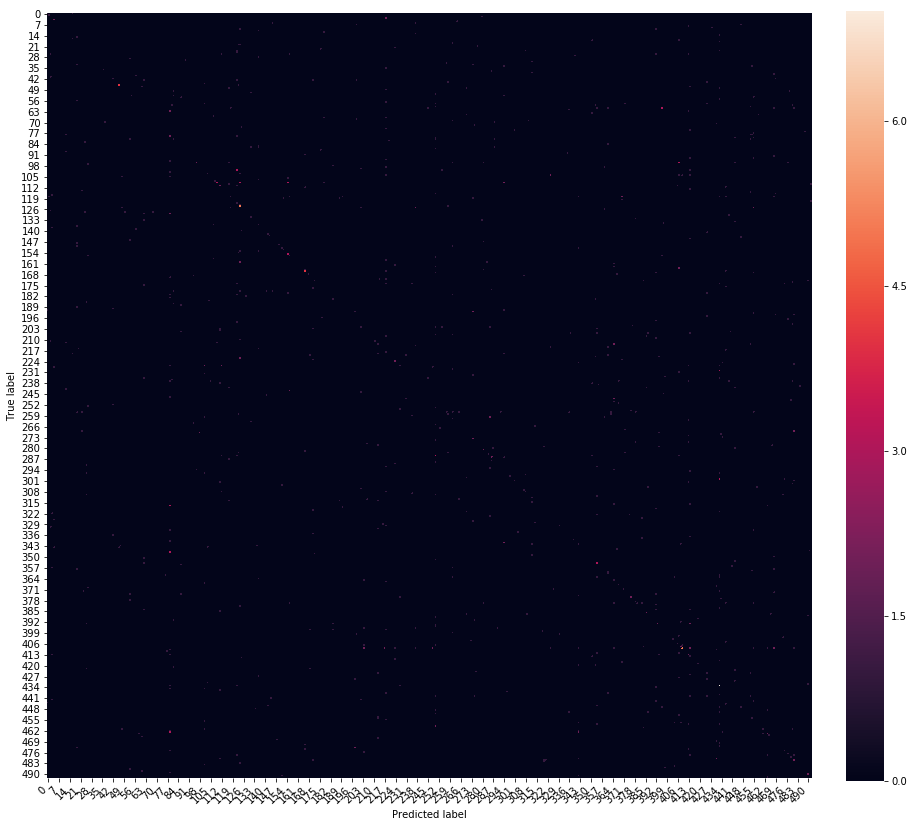

In [13]:
y_true, y_pred = np.array(pred_dict['true_lab']), np.array(pred_dict['pred_lab'])[:, 0]
conf_mat = confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
plt_conf_matrix(conf_mat)

### Weighted confusion matrix
We weight each count in the confusion matrix by the probability of the prediction.

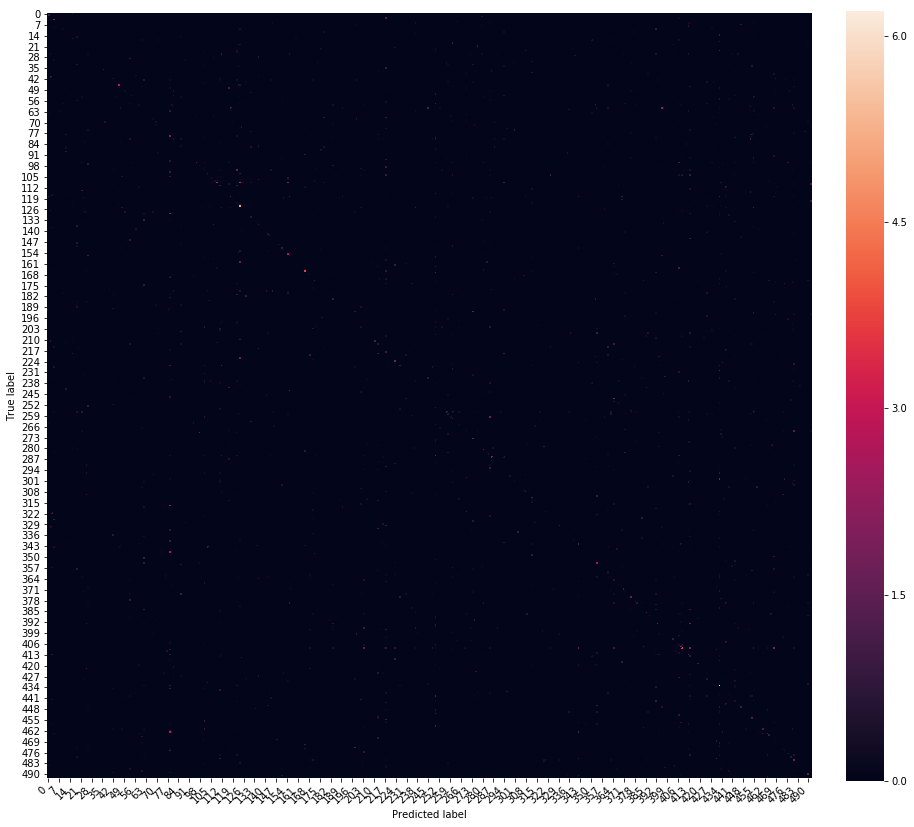

In [14]:
y_pred = np.array(pred_dict['pred_lab'])
y_true = np.repeat(np.array(pred_dict['true_lab']), y_pred.shape[1])
y_pred = y_pred.flatten()
weights = np.array(pred_dict['pred_prob']).flatten()

conf_mat = confusion_matrix(y_true, y_pred, labels=None, sample_weight=weights)
plt_conf_matrix(conf_mat)